# 🎓 Titanic Survival Prediction — Comprehensive Machine Learning Analysis  

This project explores the famous **Titanic dataset** to predict passenger survival using various **machine learning models**.  

### 🎯 **Objective**
To analyze passenger data (such as age, class, gender, and fare) and build predictive models that estimate whether a passenger survived the disaster.  

### 📋 **Workflow Overview**
1. 📂 Data Loading & Exploration  
2. 🧹 Data Cleaning & Feature Encoding  
3. 📊 Data Visualization  
4. 🤖 Model Building & Evaluation (Logistic Regression, Decision Tree, Random Forest)  
5. 📈 Model Comparison & Insights  

Dataset Source: [Kaggle - Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)


🔹 First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

🔹 Missing Values Count:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin  

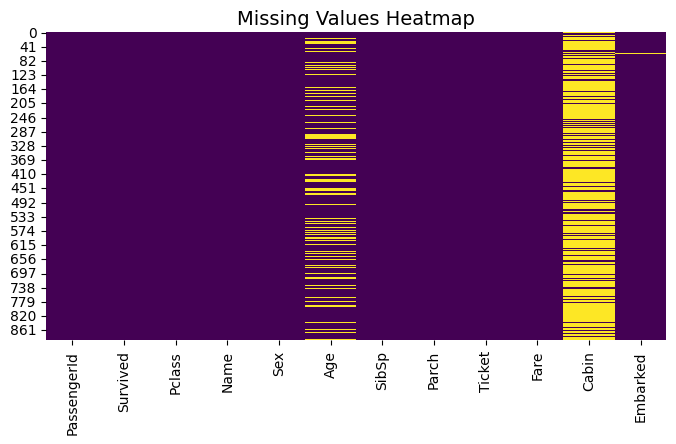

In [1]:
# 📊 Step 1: Data Overview & Cleaning Visualisation 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("train.csv")

# Display first few rows
print("🔹 First 5 rows of the dataset:")
display(df.head())

# Check basic info
print("\n🔹 Dataset Info:")
print(df.info())

# Check missing values
print("\n🔹 Missing Values Count:")
print(df.isnull().sum())
# Visualize missing values
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()


In [3]:
# Step 2: Data Cleaning and Feature Encoding

# 1️⃣ Handle missing values safely
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# Handle 'Embarked' carefully (only if the column exists)
if "Embarked" in df.columns and df["Embarked"].notna().sum() > 0:
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
else:
    df["Embarked"] = "S"  # default fallback

# 2️⃣ Convert categorical variables to numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# 3️⃣ Verify missing values are gone
print("✅ Missing values after cleaning:")
print(df.isnull().sum())

# 4️⃣ Quick data preview
print("\n🔹 Cleaned dataset preview:")
display(df.head())


✅ Missing values after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex            891
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked       891
dtype: int64

🔹 Cleaned dataset preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,NaN
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,NaN


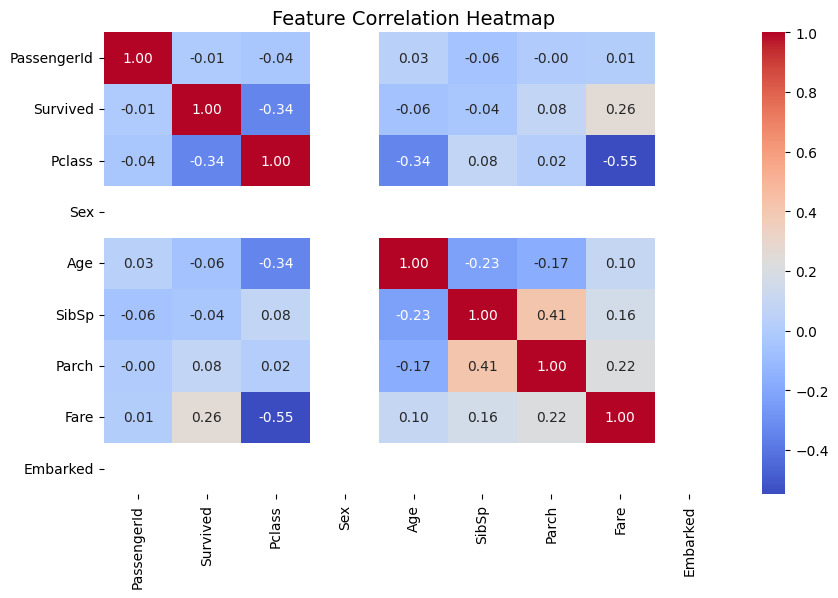

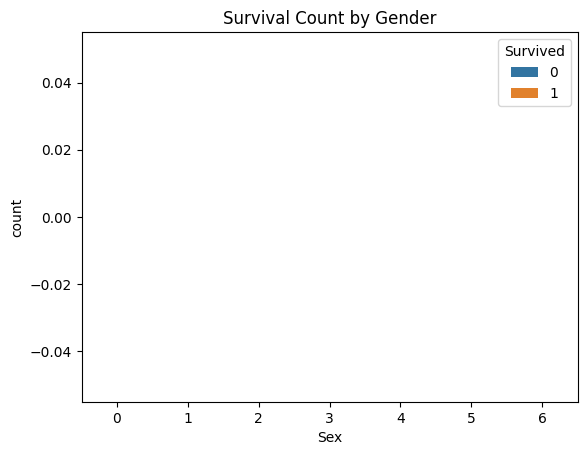

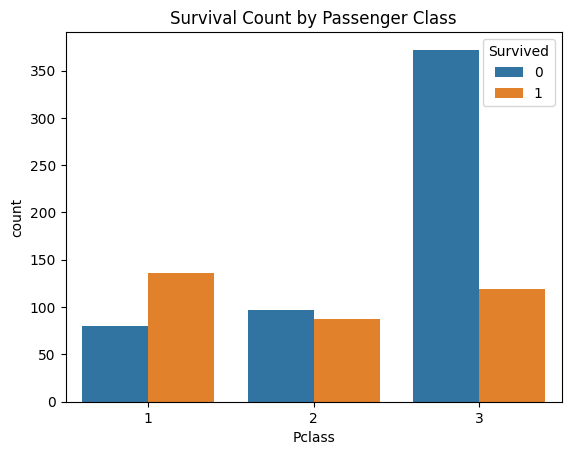

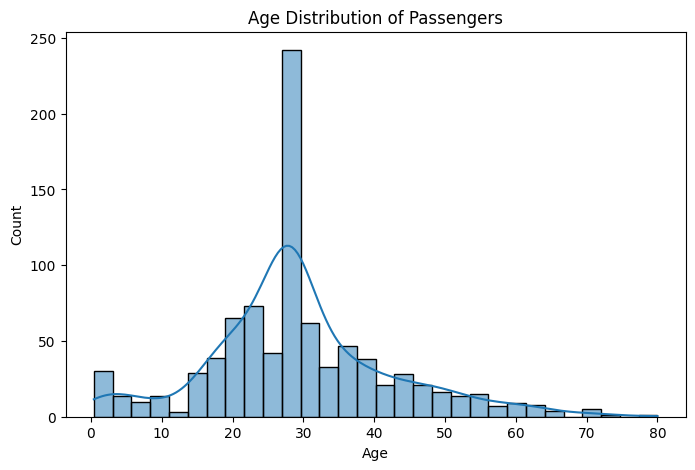

In [4]:
# Step 3: 🎨 Data Visualization (Fixed Version)

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# 1️⃣ Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

# 2️⃣ Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.show()

# 3️⃣ Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()

# 4️⃣ Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()


✅ Final shape of X: (891, 7), y: (891,)

✅ Model trained successfully!
Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       105
           1       0.77      0.50      0.61        74

    accuracy                           0.73       179
   macro avg       0.74      0.70      0.70       179
weighted avg       0.74      0.73      0.72       179



C:\Users\HP\AppData\Local\Temp\ipykernel_9316\2465221031.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_9316\2465221031.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

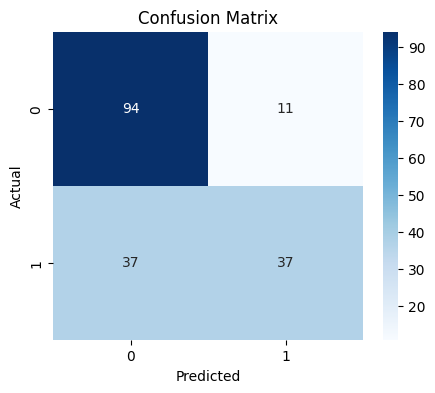


Decision Tree Accuracy: 0.7150837988826816
Random Forest Accuracy: 0.7318435754189944


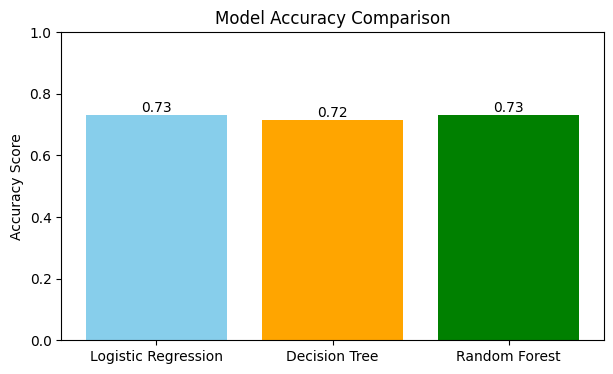

In [5]:
# Step 4: 🤖 Model Building & Evaluation (Logistic Regression)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select features and target
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
target = "Survived"

# 🧹 Final Cleaning Fixes
# Standardize text and encode categorical variables
df["Sex"] = df["Sex"].astype(str).str.strip().str.lower().map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].astype(str).str.strip().str.upper().map({"S": 0, "C": 1, "Q": 2})

# Fill missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Fare"].fillna(df["Fare"].median(), inplace=True)
df["Embarked"].fillna(0, inplace=True)
df["Sex"].fillna(0, inplace=True)

# Drop any remaining NaN rows
df.dropna(subset=features + [target], inplace=True)

# Define features (X) and target (y)
X = df[features]
y = df[target]

print(f"✅ Final shape of X: {X.shape}, y: {y.shape}")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model trained successfully!\nAccuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------------------------
# Try Decision Tree instead
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, tree_pred))

# Try Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# -----------------------------------------------
# 📊 Compare Model Accuracies
import matplotlib.pyplot as plt

accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred),
    'Decision Tree': accuracy_score(y_test, tree_pred),
    'Random Forest': accuracy_score(y_test, rf_pred)
}

plt.figure(figsize=(7,4))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue','orange','green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0,1)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)
plt.show()



## 🧩 Conclusion  

This project successfully implemented multiple models to predict Titanic passenger survival.  
All three models — **Logistic Regression (73%)**, **Decision Tree (72%)**, and **Random Forest (73%)** — achieved comparable performance, showing that feature quality and preprocessing play a major role in prediction accuracy.  

Key Learnings:  
- Proper **data cleaning** and **feature encoding** are crucial for reliable models.  
- Even small datasets can reveal meaningful trends, such as the strong influence of **gender** and **passenger class** on survival.  
- Ensemble models like **Random Forest** may not always outperform simpler ones when the dataset is limited.  

---

📚 **Prepared by:** *Antora Akter*  
🎓 *Department of Computer Science & Engineering, City University*  
📅 *February 2022*
